In [2]:
import nilearn

In [3]:
from pprint import pprint

In [4]:
from nilearn import plotting, image, masking

In [7]:
# display = plotting.plot_stat_map(tsnr_func_smooth, bg_img=anat_img, threshold=150)

In [8]:
import os
import pickle
import numpy as np
import pandas as pd

In [23]:
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Data version:

space       = ["MNI", "T1"][1]
mni         = "MNI152NLin2009cAsym"
space_desc  = {"MNI": mni, "T1": "T1w"}[space]
mni_append  = {"MNI": f"_space-{mni}", "T1": ""}[space]

afni_ver    = 'runs_v7.5'
reml        = ['', '_REML'][0]
estm        = [f'Betas{reml}', f'Tstats{reml}'][0]
lss         = ['LSS.', ''][0]
trial_wise  = True

if trial_wise:
    stats_fn = f"{lss}all-stim_all{estm}.nii"
    attr_fn  = f'{lss}all-stim_attrs.txt'
else:
    stats_fn    = f'all{estm}.nii'
    attr_fn     = 'Attrs.txt'

In [14]:
run = "02"

subj        = "sub-02"
sidx        = int(subj.replace("sub-", ""))
subj_nifti  = ["Nifti", "Nifti_slow"][int(sidx>100)]
subj_task   = ["vsl", "slowVSL"][int(sidx>100)]

top_dir     = os.path.join("/media", "data2", "pinwei", "SL_hippocampus", subj_nifti)
prep_top    = os.path.join(top_dir, "derivatives", "fmriprep_fmap_RL")
afni_top    = os.path.join(top_dir, "derivatives", "afni_out")

anat_dir    = os.path.join(prep_top, subj, "anat")
roimask_dir = os.path.join(anat_dir, "ROImasks")
func_dir    = os.path.join(prep_top, subj, "func", f"{space}_space")
stats_dir   = os.path.join(afni_top, f"SS_results_{afni_ver}", f"{subj}_r{run}.results")

anat_file   = os.path.join(anat_dir, f"{subj}{mni_append}_desc-preproc_T1w.nii.gz")
brain_mask  = anat_file.replace("preproc_T1w", "brain_mask")
bold_file   = os.path.join(func_dir, f"{subj}_task-{subj_task}_run-{run}_space-{space_desc}_desc-preproc_bold.nii.gz")
stats_file  = os.path.join(stats_dir, stats_fn)
attr_file   = os.path.join(stats_dir, attr_fn)

In [42]:
stim_type, stim_list = [
    ("tpl_orig", ["A1","A2","A3","B1","B2","B3","C1","C2","C3","D1","D2","D3"]),
    ("tpl_sorted", ["A-1","A-2","A-3","B-1","B-2","B-3","C-1","C-2","C-3","D-1","D-2","D-3"]),
    ("triplets", ["A", "B", "C", "D"])
    # ("shape_png", [ "{:02d}".format(x) for x in range(1, 13) ])
][0]

In [36]:
stim_labels = pd.read_csv(attr_file, sep = "\t", header = None)[0].to_list()

In [20]:
roi      = "Hippocampus"
roi_mask = os.path.join(roimask_dir, f"roimask_space-{space_desc}_{roi}_resam.nii.gz")
roimask  = image.load_img(roi_mask)

In [15]:
anat_img  = image.load_img(anat_file)
brainmask = image.load_img(brain_mask)
roimask   = image.load_img(roi_mask)
bold_img  = image.load_img(bold_file)
stats_img = image.load_img(stats_file)

In [26]:
print("anat file:  ", anat_img.shape) 
# print("brain mask: ", brainmask.shape) 
print("roi mask:   ", roimask.shape) 
print("bold file:  ", bold_img.shape) 
print("stats file: ", stats_img.shape) 

anat image:   (192, 256, 256)
bold image:   (65, 57, 62, 115)
stats image:  (65, 57, 62, 65)
brain mask:   (192, 256, 256)
roi mask:     (65, 57, 62)


In [46]:
masked_stats = masking.apply_mask(stats_img, roimask)
print("Shape of masked dataset:", masked_stats.shape)

Shape of masked dataset: (65, 355)


In [45]:
stim_select = stim_list[0]
stim_select_indices = [ lab == stim_select for lab in stim_labels ]

In [47]:
selected_masked_stats = masked_stats[stim_select_indices]

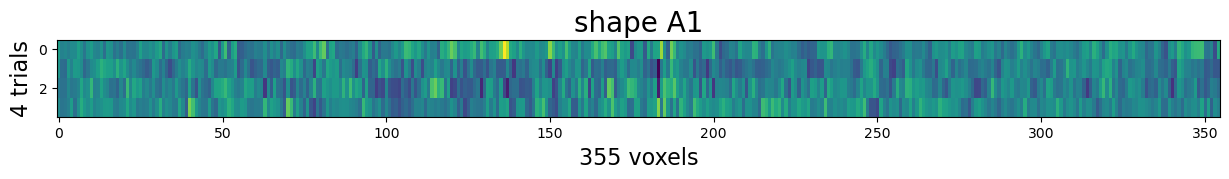

In [59]:
plt.figure(figsize=(15, 1))
plt.imshow(selected_masked_stats, aspect='auto')
plt.xlabel(f"{selected_masked_stats.shape[1]} voxels", fontsize=16)
plt.ylabel(f"{selected_masked_stats.shape[0]} trials", fontsize=16)
plt.title(f"shape {stim_select}", fontsize=20)
# plt.colorbar()
plt.show()

In [ ]:
# square root of inv = ^(-1/2)
from scipy.linalg import sqrtm
D = sqrtm(np.linalg.inv(noise_cov))